In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=300
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error        

In [2]:
df=pd.read_csv('CocaCola_Sales.csv')
df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [4]:
df.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
## Check Stationary

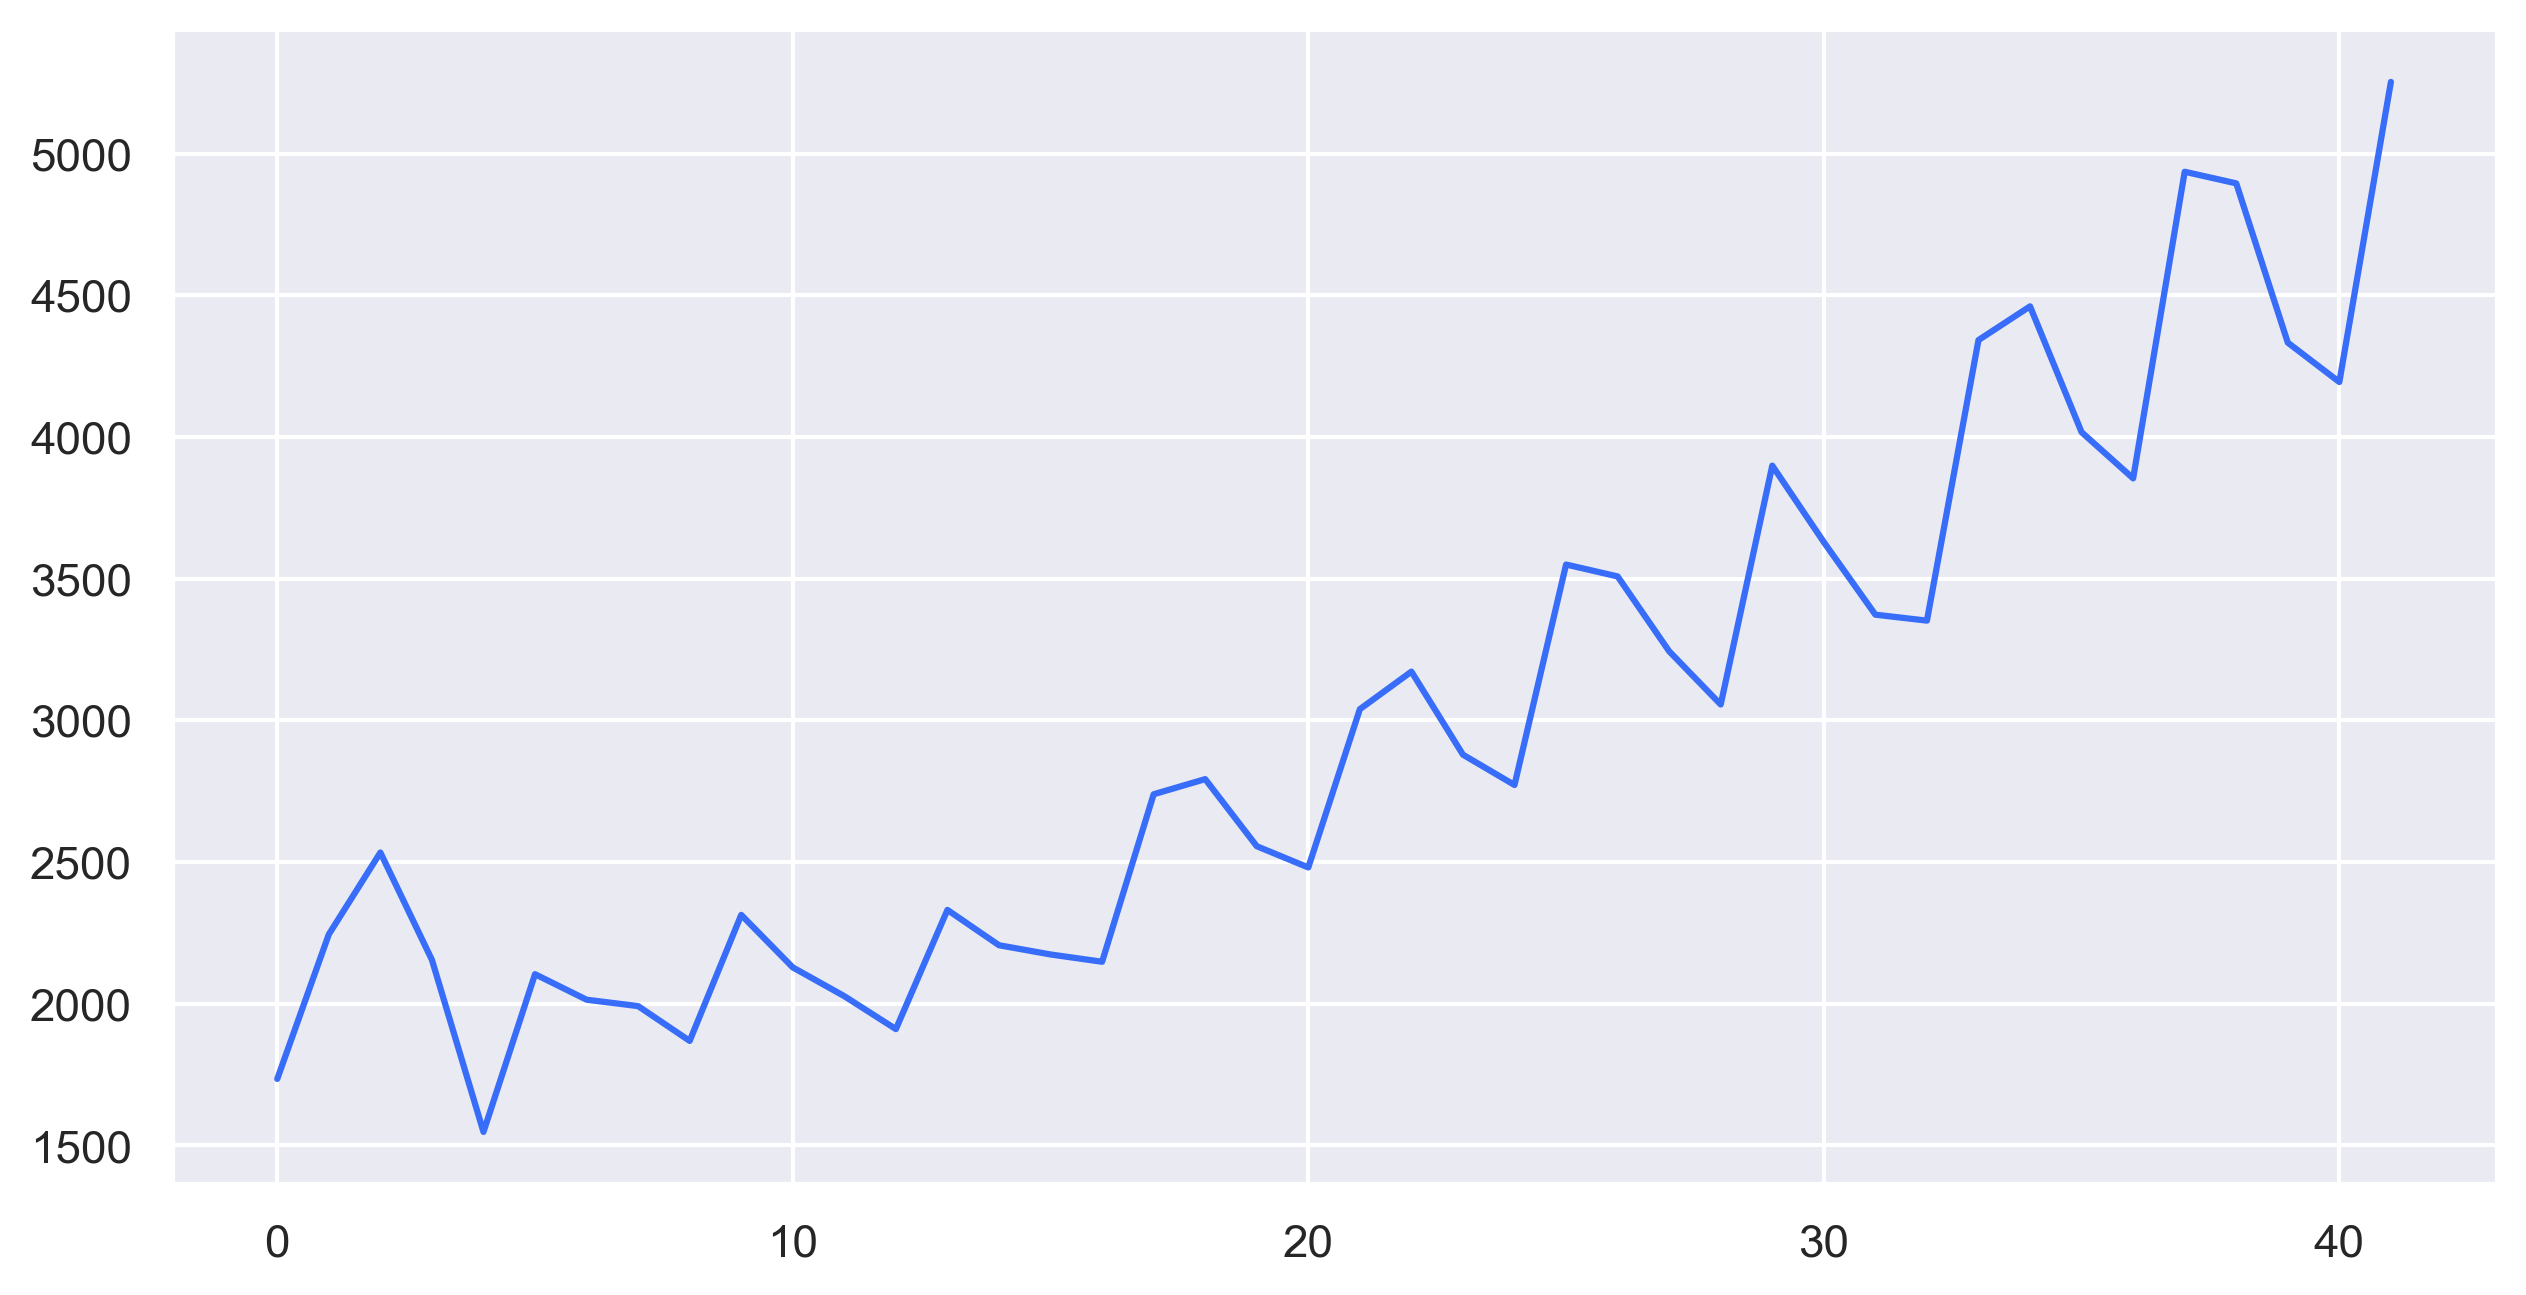

In [7]:
plt.plot(df['Sales'])

In [10]:
adfuller(df['Sales'])[1]

0.9966611674081021

#### Data is not stationary

# To calculate first order diff.

In [11]:
df['first_order']=df['Sales'].diff(periods=1)
df

,Quarter,Sales,first_order
0,Q1_86,1734.827000,NaN
1,Q2_86,2244.960999,510.133999
2,Q3_86,2533.804993,288.843994
3,Q4_86,2154.962997,-378.841996
4,Q1_87,1547.818996,-607.144001
5,Q2_87,2104.411995,556.592999
6,Q3_87,2014.362999,-90.048996
7,Q4_87,1991.746998,-22.616001
8,Q1_88,1869.049999,-122.696999
9,Q2_88,2313.631996,444.581997


In [12]:
## Drop null value
df.dropna(inplace=True)
df

,Quarter,Sales,first_order
1,Q2_86,2244.960999,510.133999
2,Q3_86,2533.804993,288.843994
3,Q4_86,2154.962997,-378.841996
4,Q1_87,1547.818996,-607.144001
5,Q2_87,2104.411995,556.592999
6,Q3_87,2014.362999,-90.048996
7,Q4_87,1991.746998,-22.616001
8,Q1_88,1869.049999,-122.696999
9,Q2_88,2313.631996,444.581997
10,Q3_88,2128.320000,-185.311996


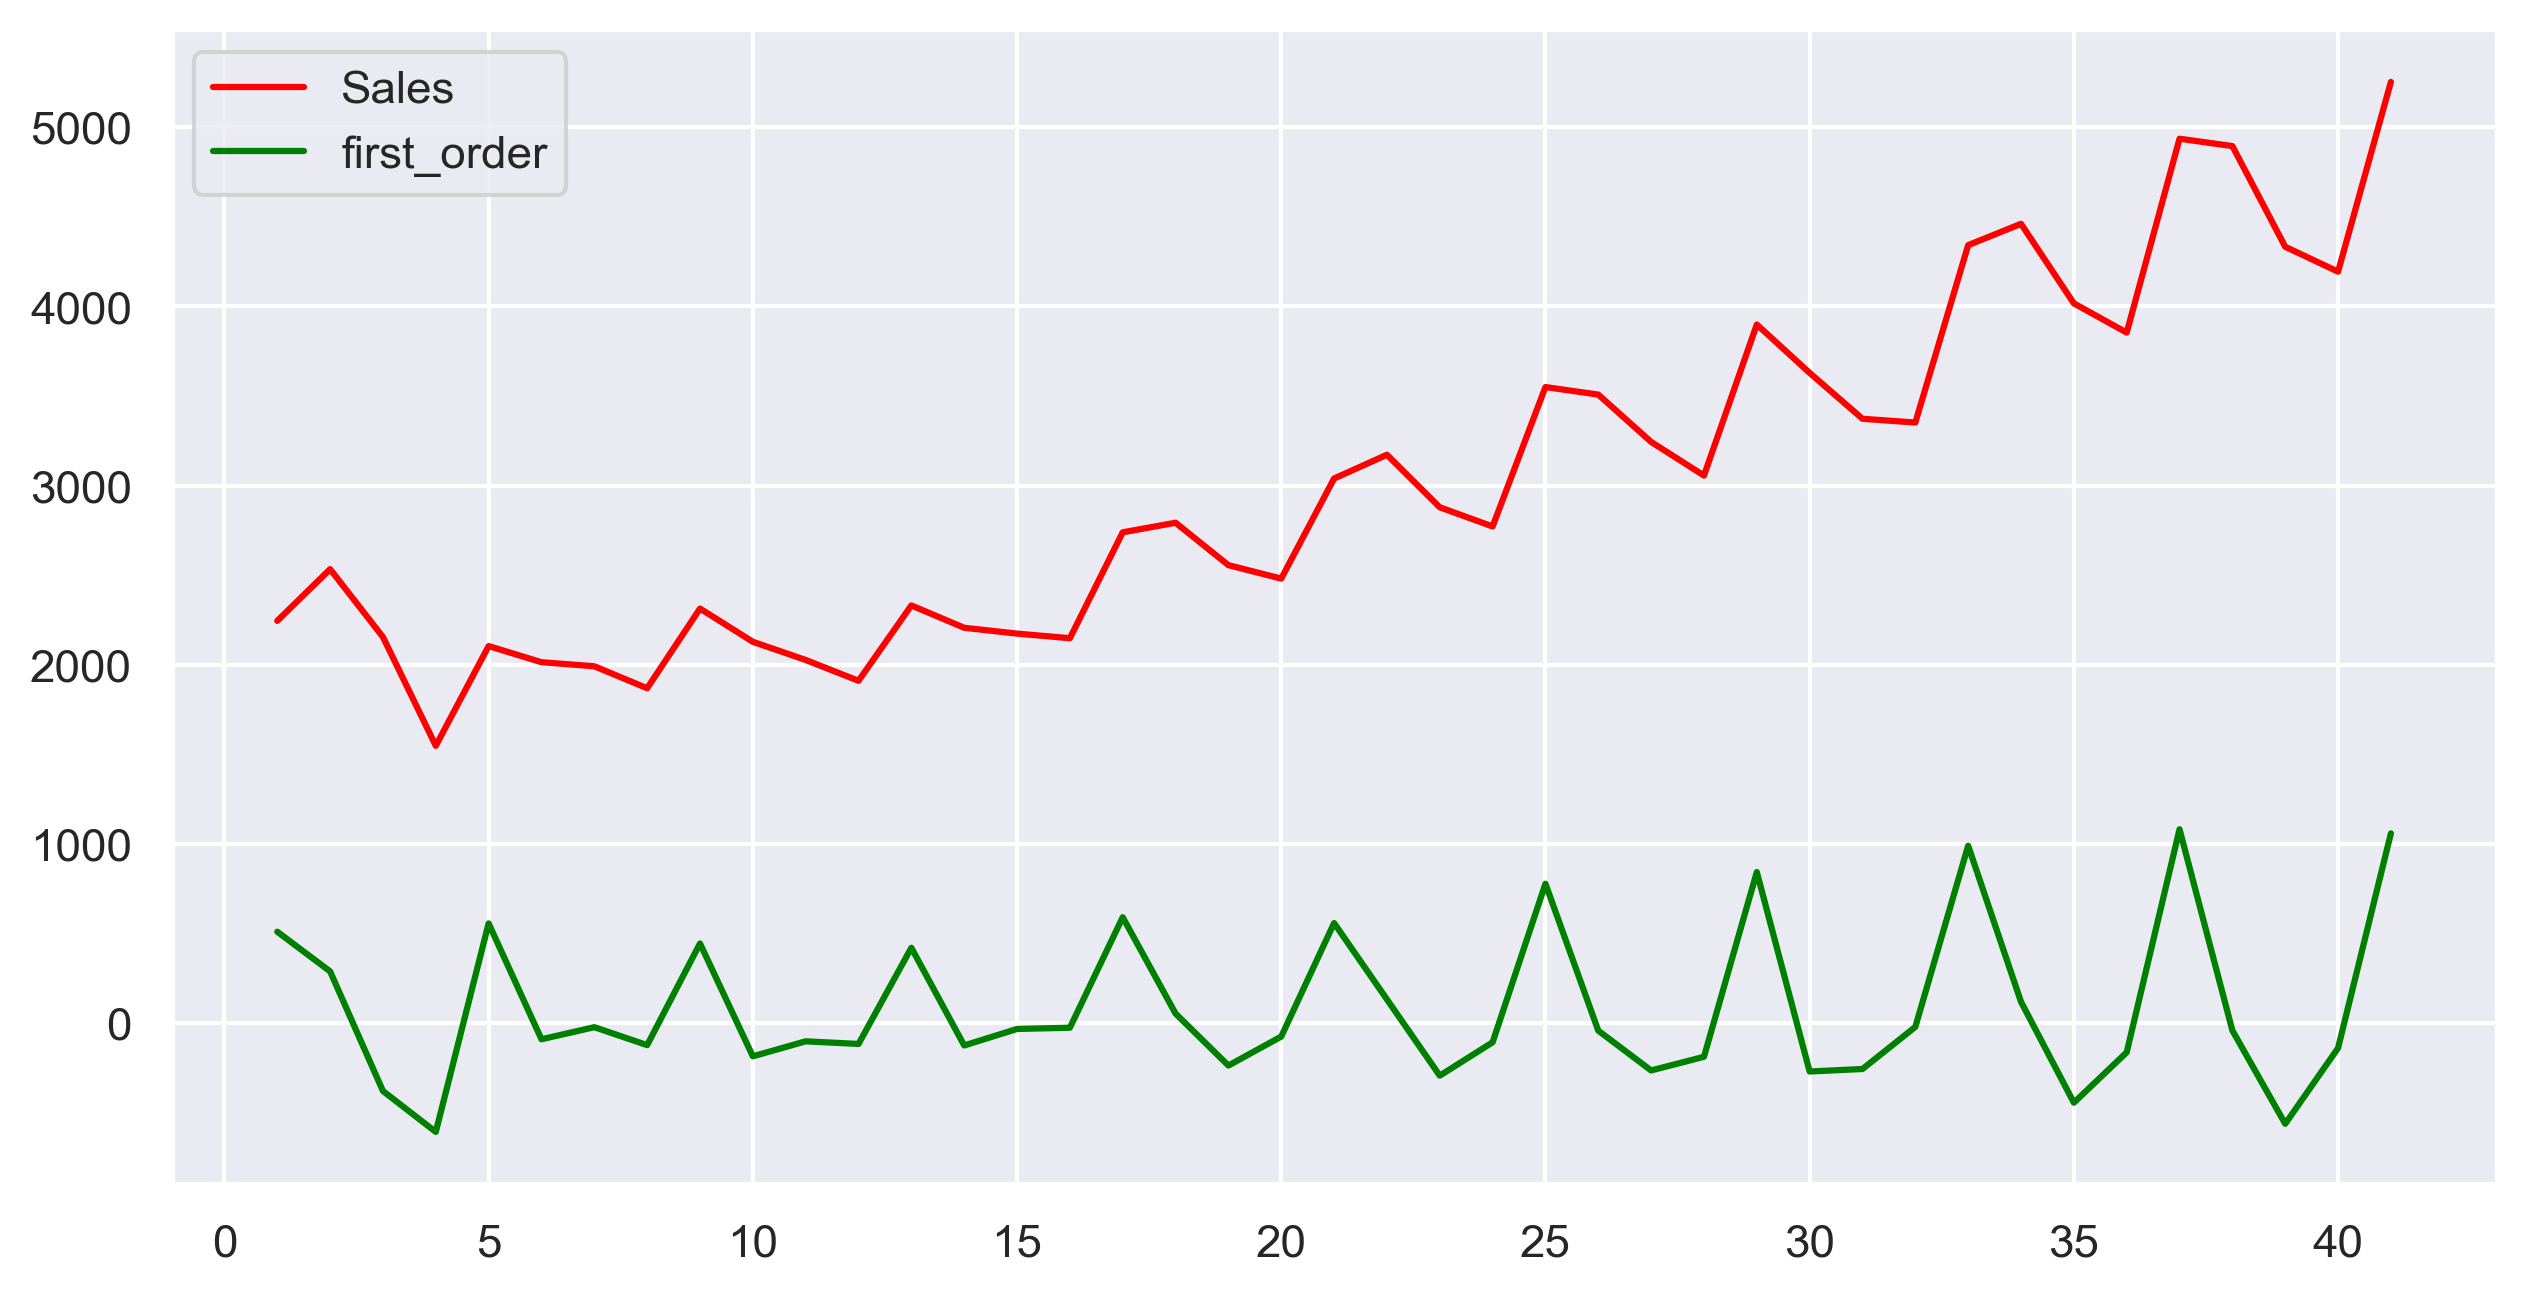

In [13]:
import statsmodels.formula.api as smf
plt.plot(df['Sales'],color='red',label='Sales')
plt.plot(df['first_order'],color='green',label='first_order')
plt.legend()

##### Now data became stationary

# Calculate autocorrelation value

In [16]:
acf_value=acf(df['first_order'])
acf_value

array([ 1.        , -0.12698142, -0.58248116, -0.14078903,  0.77149614,
       -0.14552797, -0.45200093, -0.08720848,  0.63989518, -0.10590553,
       -0.36920089, -0.09077286,  0.53661329, -0.13653501, -0.34381079,
       -0.04096384,  0.48023407])

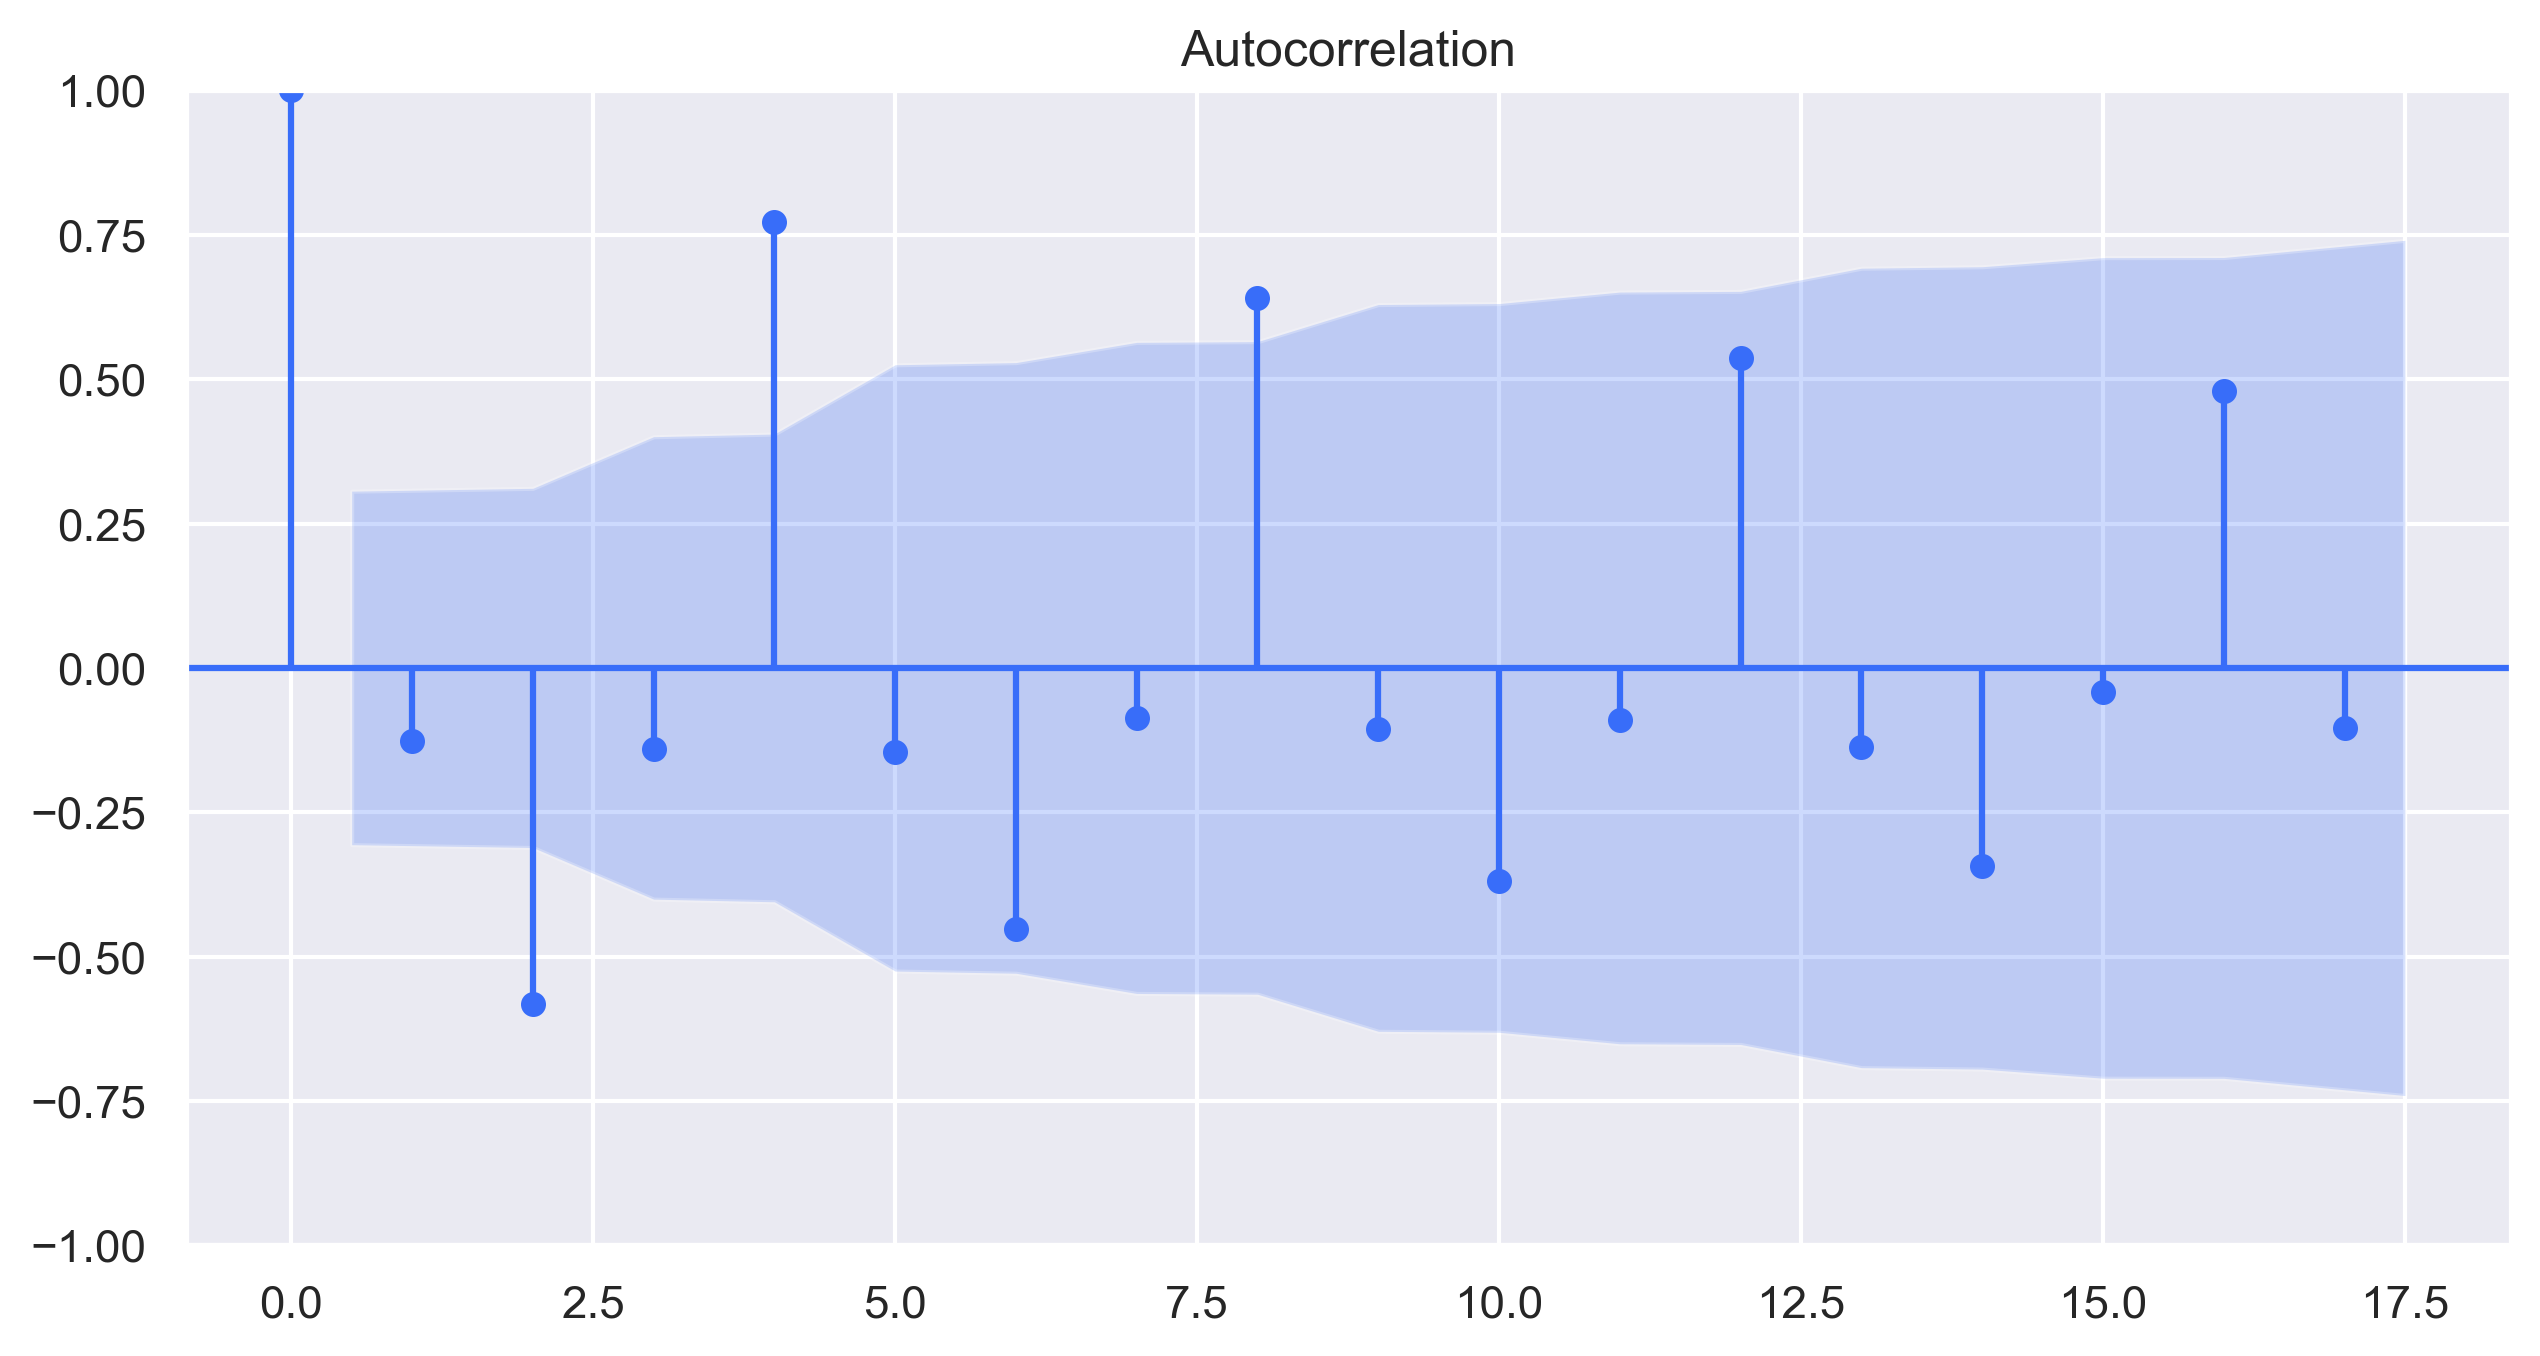

In [18]:
## plot acf
plot_acf(df['first_order']);

# Partial Autocorrelation Function

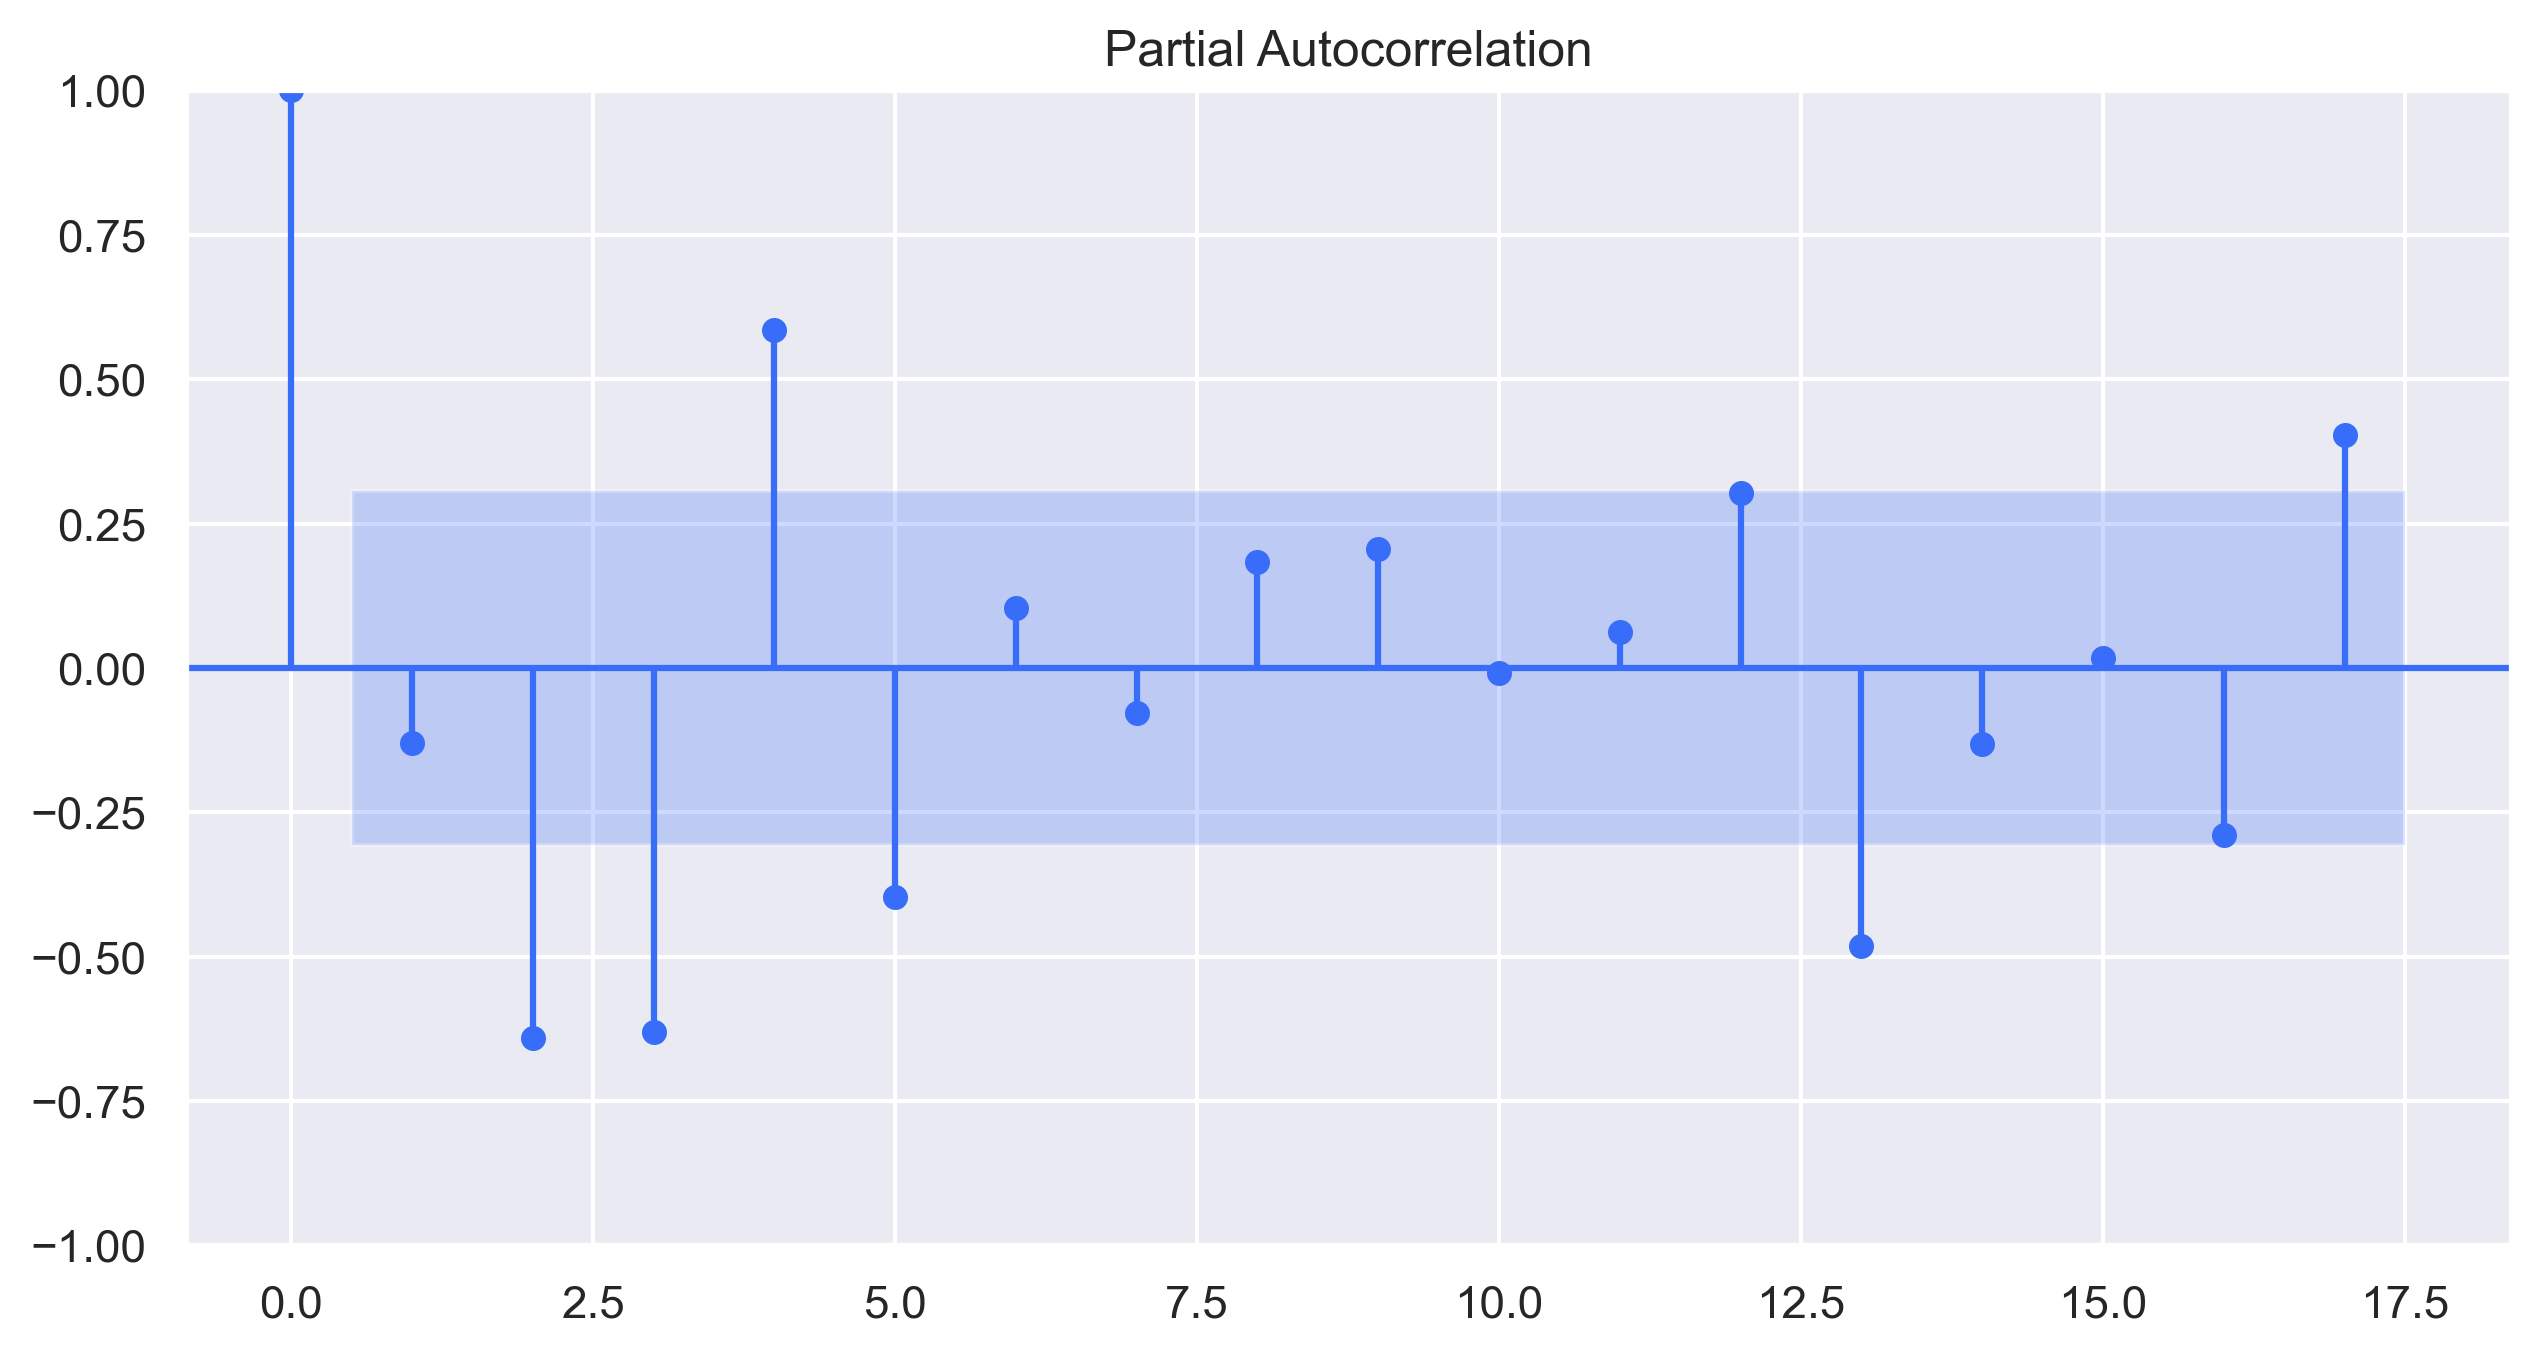

In [20]:
# Plot Pacf

plot_pacf(df['first_order']);

# Different Models

# 1) ARIMA Model

In [21]:
train=df.iloc[:-30,:]
test=df.tail(30)

In [22]:
df.shape

(41, 3)

In [23]:
train.shape

(11, 3)

In [24]:
test.shape

(30, 3)

In [25]:
order=auto_arima(df['Sales'])

In [26]:
order

ARIMA(order=(3, 2, 2), scoring_args={}, suppress_warnings=True)

In [28]:
arima_model=ARIMA(train['Sales'],order=(3,2,2)).fit()

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\HP\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [29]:
arima_ypred=arima_model.predict(start=11,end=40)

C:\Users\HP\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [30]:
arima_ypred

11    1977.981297
12    2323.854183
13    1927.608888
14    1989.688648
15    2080.985552
16    2187.986384
17    1774.684135
18    2075.609513
19    2076.931676
20    1980.832432
21    1762.853801
22    2164.986981
23    1930.161428
24    1839.004137
25    1862.021797
26    2135.844603
27    1729.415243
28    1841.641320
29    1945.487214
30    1970.081026
31    1609.955306
32    1941.753001
33    1900.756787
34    1768.741807
35    1635.538054
36    2007.740016
37    1727.458309
38    1663.445432
39    1743.224756
40    1938.412504
Name: predicted_mean, dtype: float64

In [31]:
Arima_rmse=np.sqrt(mean_squared_error(test['Sales'],arima_ypred))

In [32]:
Arima_rmse

1750.1849798657681

# 2) Linear regression model

In [33]:
df['last_month']=df['Sales'].shift(+1)

In [34]:
df.dropna(inplace=True)

In [35]:
df

,Quarter,Sales,first_order,last_month
2,Q3_86,2533.804993,288.843994,2244.960999
3,Q4_86,2154.962997,-378.841996,2533.804993
4,Q1_87,1547.818996,-607.144001,2154.962997
5,Q2_87,2104.411995,556.592999,1547.818996
6,Q3_87,2014.362999,-90.048996,2104.411995
7,Q4_87,1991.746998,-22.616001,2014.362999
8,Q1_88,1869.049999,-122.696999,1991.746998
9,Q2_88,2313.631996,444.581997,1869.049999
10,Q3_88,2128.320000,-185.311996,2313.631996
11,Q4_88,2026.828999,-101.491001,2128.320000


In [36]:
import statsmodels.formula.api as smf

In [38]:
linear=smf.ols('Sales~last_month',data=df).fit()

In [39]:
linear_rmse=linear.rsquared

In [40]:
linear_rmse

0.8015288039636592

# 3) RandomForest Regressor

In [41]:
df['2_monthback']=df['Sales'].shift(+2)

In [42]:
df['3_monthback']=df['Sales'].shift(+3)

In [43]:
df.dropna(inplace=True)

In [44]:
df

,Quarter,Sales,first_order,last_month,2_monthback,3_monthback
5,Q2_87,2104.411995,556.592999,1547.818996,2154.962997,2533.804993
6,Q3_87,2014.362999,-90.048996,2104.411995,1547.818996,2154.962997
7,Q4_87,1991.746998,-22.616001,2014.362999,2104.411995,1547.818996
8,Q1_88,1869.049999,-122.696999,1991.746998,2014.362999,2104.411995
9,Q2_88,2313.631996,444.581997,1869.049999,1991.746998,2014.362999
10,Q3_88,2128.320000,-185.311996,2313.631996,1869.049999,1991.746998
11,Q4_88,2026.828999,-101.491001,2128.320000,2313.631996,1869.049999
12,Q1_89,1910.603996,-116.225003,2026.828999,2128.320000,2313.631996
13,Q2_89,2331.164993,420.560997,1910.603996,2026.828999,2128.320000
14,Q3_89,2206.549995,-124.614998,2331.164993,1910.603996,2026.828999


In [45]:
x=df.iloc[:,3:]
y=df['Sales']

In [46]:
x

,last_month,2_monthback,3_monthback
5,1547.818996,2154.962997,2533.804993
6,2104.411995,1547.818996,2154.962997
7,2014.362999,2104.411995,1547.818996
8,1991.746998,2014.362999,2104.411995
9,1869.049999,1991.746998,2014.362999
10,2313.631996,1869.049999,1991.746998
11,2128.320000,2313.631996,1869.049999
12,2026.828999,2128.320000,2313.631996
13,1910.603996,2026.828999,2128.320000
14,2331.164993,1910.603996,2026.828999


In [47]:
## Train test split
from sklearn.ensemble import RandomForestRegressor

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [48]:
rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)
random_ypred=rf.predict(xtest)


In [49]:
ran_rmse=np.sqrt(mean_squared_error(ytest,random_ypred))

In [50]:
ran_rmse

420.1860272367144

# 4) XGB Regressor

In [51]:
from xgboost import XGBRegressor

In [52]:
xgb=XGBRegressor()
xgb.fit(xtrain,ytrain)
xgb_ypred=xgb.predict(xtest)

In [53]:
xgb_rmse=np.sqrt(mean_squared_error(ytest,xgb_ypred))

In [54]:
xgb_rmse

444.41477897717965

# Models & RMSE values

In [56]:
table=pd.DataFrame({'Model':['Arima','Linear regression',
                             'Random forest regressor','XGB regressor'],
                    'RMSE':[Arima_rmse,linear_rmse,ran_rmse,xgb_rmse]})

In [57]:
table

,Model,RMSE
0,Arima,1750.184980
1,Linear regression,0.801529
2,Random forest regressor,420.186027
3,XGB regressor,444.414779


# Linear regression model is best for forcasting

In [59]:
newdf=pd.DataFrame({'last_month':[1234,190,3122,2167]})

In [60]:
newdf

,last_month
0,1234
1,190
2,3122
3,2167


In [61]:
linear_ypred=linear.predict(newdf)

In [62]:
linear_ypred

0    1387.652279
1     390.848504
2    3190.301253
3    2278.474045
dtype: float64

In [63]:
newdf['linear_ypred']=linear_ypred

In [64]:
newdf

,last_month,linear_ypred
0,1234,1387.652279
1,190,390.848504
2,3122,3190.301253
3,2167,2278.474045


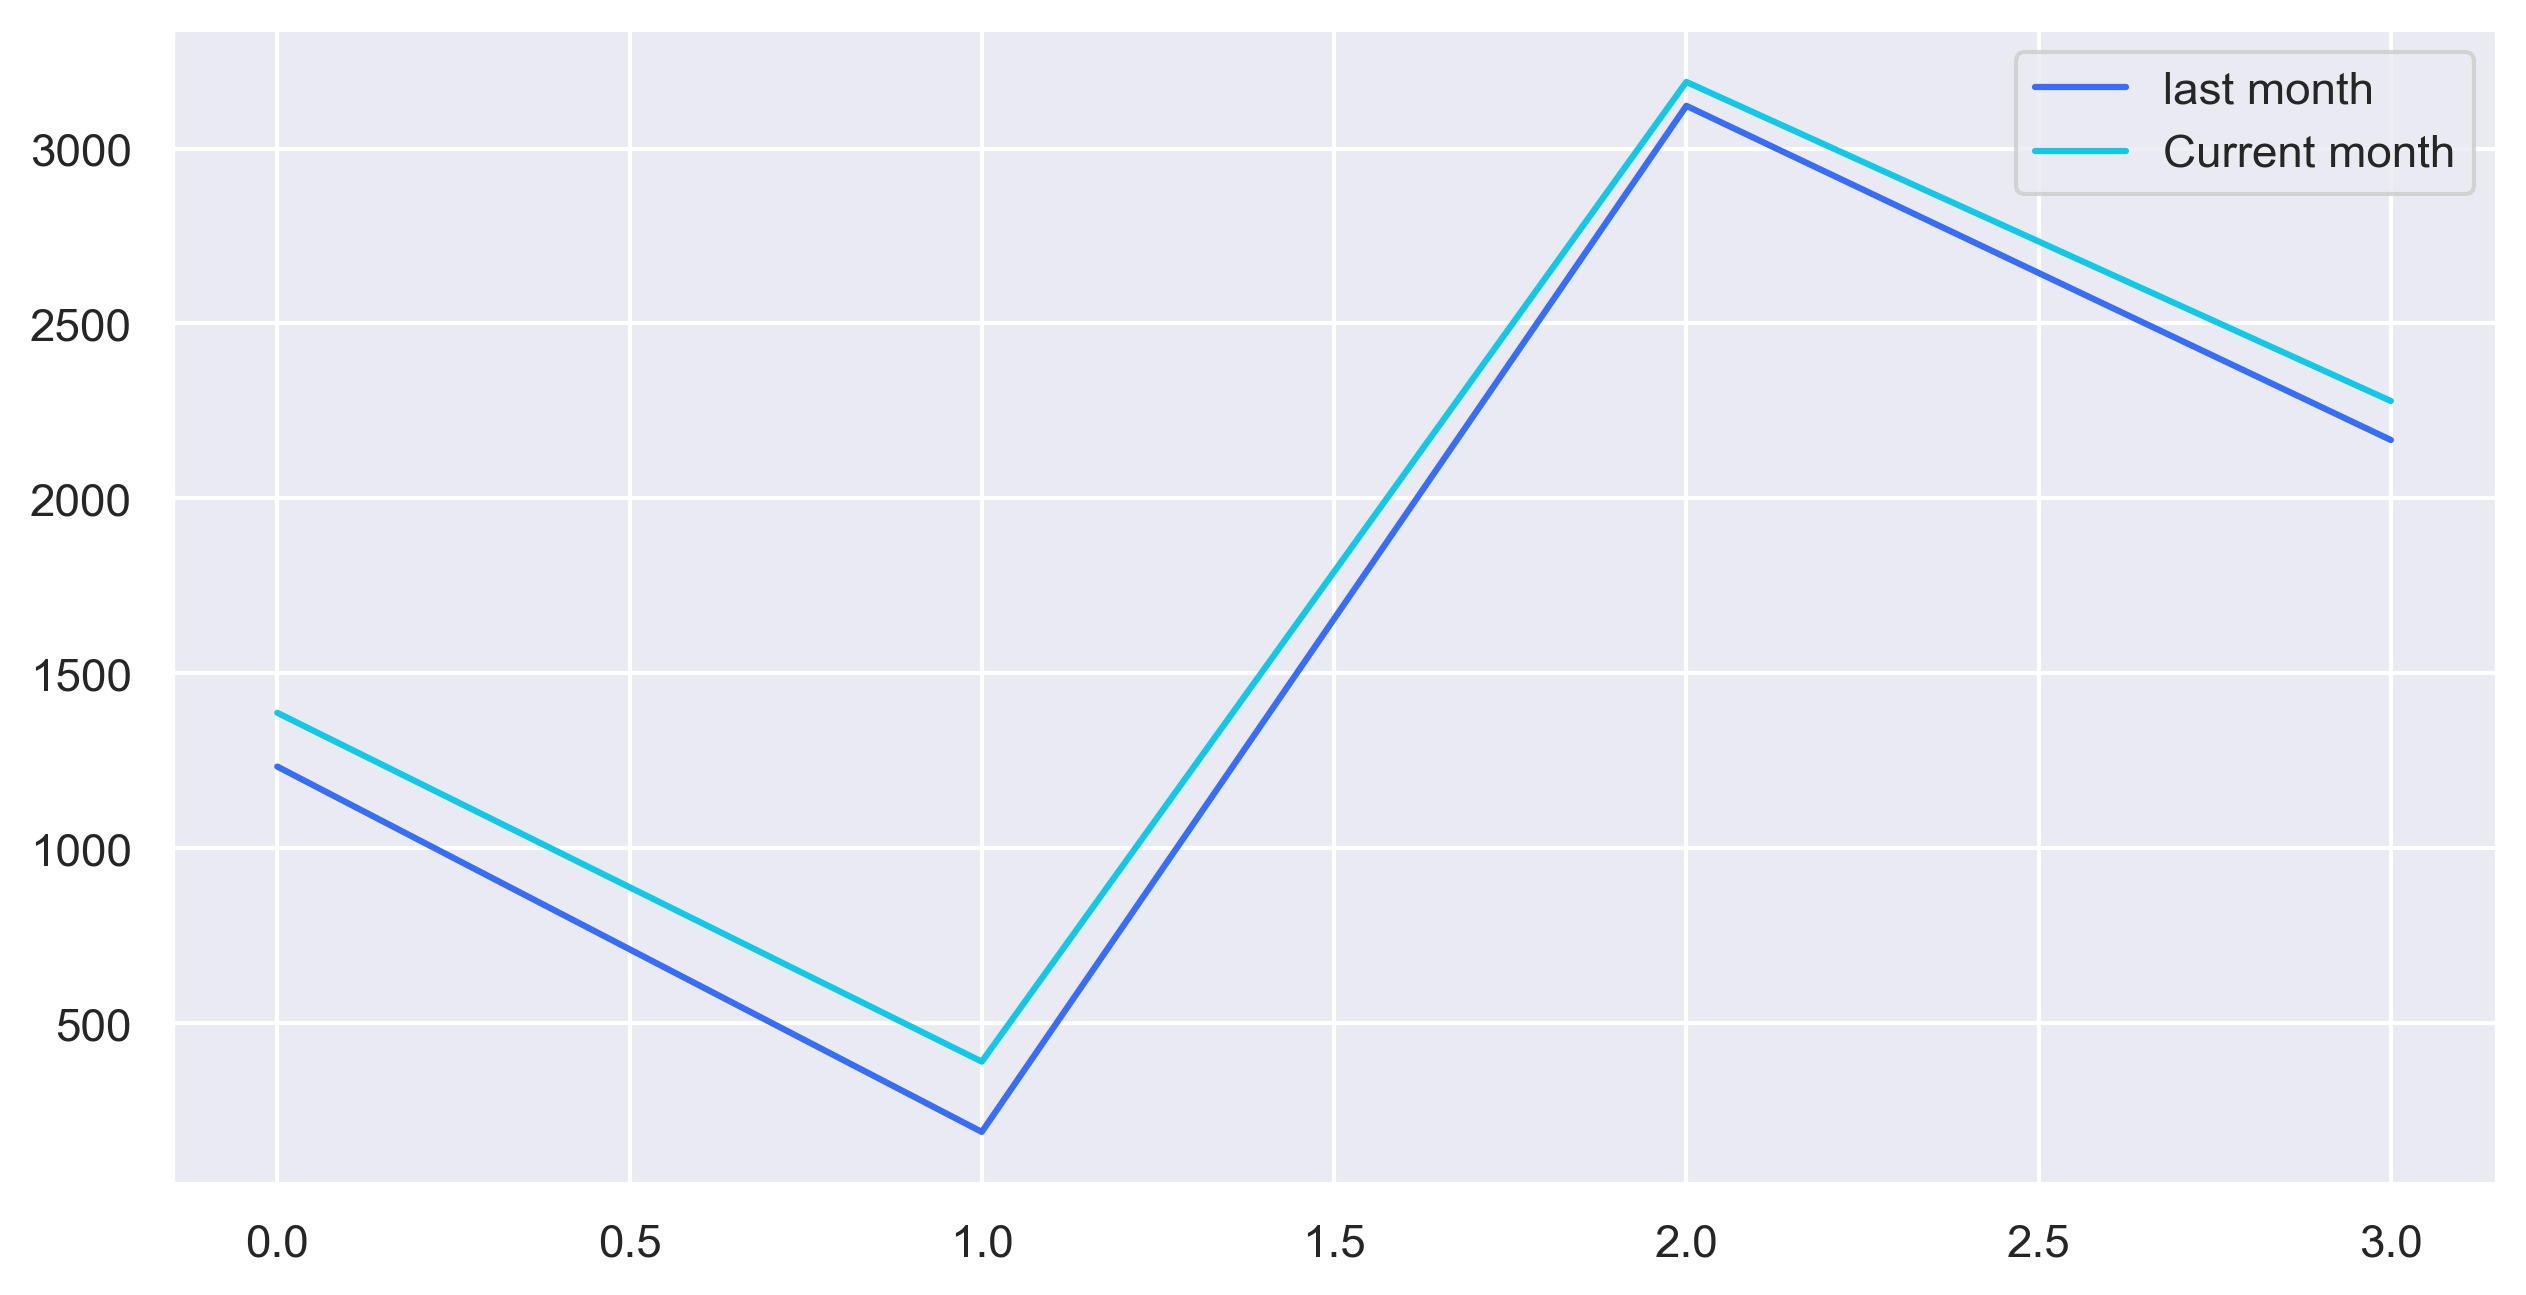

In [65]:
plt.plot(newdf['last_month'],label='last month')
plt.plot(newdf['linear_ypred'],label='Current month')
plt.legend()